In [50]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold, RFECV, SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import timeit

In [53]:
data = np.genfromtxt('data/dataset.csv', delimiter=',')

,encounter_id,patient_id,hospital_id,age,bmi,ethnicity,gender,height,icu_admit_source,icu_id,...,d1_potassium_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,66154,25312,118,68.0,22.730000,3,2,180.3,2,92,...,3.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,114252,59342,81,77.0,27.420000,3,1,160.0,2,90,...,3.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
5,33181,74489,83,67.0,27.560000,3,2,190.5,1,95,...,3.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
10,105427,125898,77,72.0,28.257052,4,1,154.9,3,113,...,4.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
17,22471,112115,118,46.0,25.845717,4,2,167.6,1,92,...,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91698,83806,68549,195,47.0,51.439842,3,2,195.0,3,908,...,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
91706,127138,59223,121,54.0,19.770448,5,2,177.8,1,925,...,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
91708,91592,78108,30,75.0,23.060250,3,2,177.8,2,927,...,4.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
91709,66119,13486,121,56.0,47.179671,3,1,183.0,2,925,...,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [68]:
df = pd.read_csv('data/dataset.csv')
# print(df.info())

# check death rateb before dropping NaNs
death_outcome = df["hospital_death"]
print(np.mean(death_outcome))
df = df.dropna()  # drop any datapoint that contains one na

# drop any features directly related to APACHE
df = df[df.columns.drop(list(df.filter(regex="apache")))]

# drop elective_surgery
df = df.drop("elective_surgery", axis=1)

# codify ethnicity
df = df.replace(to_replace="African American", value = 1)
df = df.replace(to_replace="Asian", value = 2)
df = df.replace(to_replace="Caucasian", value = 3)
df = df.replace(to_replace="Hispanic", value = 4)
df = df.replace(to_replace="Native American", value = 5)
df = df.replace(to_replace="Other/Unknown", value = 6)

# codify gender
df = df.replace(to_replace="F", value = 1)
df = df.replace(to_replace="M", value = 2)

# codify icu_admit_source
df = df.replace(to_replace="Accident & Emergency", value = 1)
df = df.replace(to_replace="Floor", value = 2)
df = df.replace(to_replace="Operating Room / Recovery", value = 3)
df = df.replace(to_replace="Other Hospital", value = 4)
df = df.replace(to_replace="Other ICU", value = 5)

# codify icu_stay_type
df = df.replace(to_replace="admit", value = 1)
df = df.replace(to_replace="readmit", value = 2)
df = df.replace(to_replace="transfer", value = 3)

# codify icu_type
df = df.replace(to_replace="Cardiac ICU", value = 1)
df = df.replace(to_replace="CCU-CTICU", value = 2)
df = df.replace(to_replace="CSICU", value = 3)
df = df.replace(to_replace="CTICU", value = 4)
df = df.replace(to_replace="Med-Surg ICU", value = 5)
df = df.replace(to_replace="MICU", value = 6)
df = df.replace(to_replace="Neuro ICU", value = 7)
df = df.replace(to_replace="SICU", value = 8)

0.08630183289173836


In [49]:
df

,encounter_id,patient_id,hospital_id,age,bmi,ethnicity,gender,height,icu_admit_source,icu_id,...,d1_potassium_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,66154,25312,118,68.0,22.730000,3,2,180.3,2,92,...,3.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,114252,59342,81,77.0,27.420000,3,1,160.0,2,90,...,3.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
5,33181,74489,83,67.0,27.560000,3,2,190.5,1,95,...,3.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
10,105427,125898,77,72.0,28.257052,4,1,154.9,3,113,...,4.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
17,22471,112115,118,46.0,25.845717,4,2,167.6,1,92,...,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91698,83806,68549,195,47.0,51.439842,3,2,195.0,3,908,...,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
91706,127138,59223,121,54.0,19.770448,5,2,177.8,1,925,...,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
91708,91592,78108,30,75.0,23.060250,3,2,177.8,2,927,...,4.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
91709,66119,13486,121,56.0,47.179671,3,1,183.0,2,925,...,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
# convert dataframe to numpy array
data_m = df.to_numpy()

Text(0.5, 1.0, 'Built-in Bias: Ratio of Patients who Survived / Passed')

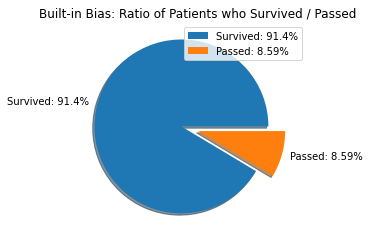

In [7]:
# show bias in the dataset
plt.figure()
plt.pie([1-np.mean(data_m[:,-1]), np.mean(data_m[:,-1])], labels=["Survived: 91.4%", "Passed: 8.59%"], shadow=True, explode=[0.2, 0])
plt.legend()
plt.title("Built-in Bias: Ratio of Patients who Survived / Passed")

In [8]:
# normalize all features
def scale_features(dataset):
    num_col = dataset.shape[1]
    dataset_normalized = np.empty(dataset.shape)
    for i in range(num_col-1):
        array = dataset[:,i]
        array_mean = np.mean(array)
        array_stdev = np.std(array)
        if array_stdev != 0:
            array_normalized = (array - array_mean) / array_stdev
        dataset_normalized[:,i] = array_normalized
    dataset_normalized[:,-1] = dataset[:,-1]
    return dataset_normalized

data_normed_m = scale_features(data_m)
np.random.shuffle(data_normed_m)

In [9]:
# split data into train and test set
def split_data(dataset, ratio_train):
    split = int(len(dataset) * ratio_train)
    train_data = np.array(dataset[:split])
    test_data = np.array(dataset[split:])
    return train_data, test_data

train_data, test_data = split_data(data_normed_m, 0.8)
print(np.mean(train_data[:,-1]))

0.08628260296829718


In [10]:
# separate the features and labels
train_X = train_data[:,:-1]
train_y = train_data[:,-1]
test_X = test_data[:,:-1]
test_y = test_data[:,-1]
test_y = test_y[:,np.newaxis]

In [11]:
SVM = SVC(C=1, gamma=0.001)
svm_start = timeit.default_timer()
SVM.fit(train_X, train_y)
svm_end = timeit.default_timer()
print("SVM accuracy:", SVM.score(test_X, test_y))
svm_runtime = svm_end - svm_start
print(str(svm_runtime) + " seconds")


SVM accuracy: 0.9157811539474839
51.510107319999996 seconds


In [12]:
# Feature Selection (Filter Method)
# First, split the current training set further into training and validation set
fs_train, fs_val = split_data(train_data, 0.8)
fs_train_X = fs_train[:, :-1]
fs_train_y = fs_train[:, -1]
fs_val_X = fs_val[:, :-1]
fs_val_y = fs_val[:, -1]
fs_val_y = fs_val_y[:, np.newaxis]

In [13]:
sfm_selector = SelectFromModel(estimator=LogisticRegression(max_iter=10000))
sfm_selector.fit(fs_train_X, fs_train_y)
sfm_support = sfm_selector.get_support()
sfm_coeff = np.abs(sfm_selector.estimator_.coef_)

In [14]:
sfm_accuracy_v = np.zeros(sfm_coeff.shape[1])
sfm_test_accuracy_v = np.zeros(sfm_coeff.shape[1])
for i in range(sfm_coeff.shape[1]):
    ind_features = np.flip(np.argsort(sfm_coeff)[0,-i:])
    current_train_X = fs_train_X[:, ind_features]
    tmp_clf = LogisticRegression(max_iter=1000)
    tmp_clf.fit(current_train_X, fs_train_y)
    current_test_X = fs_val_X[:, ind_features]
    accuracy = tmp_clf.score(current_test_X, fs_val_y)
    sfm_accuracy_v[i] = accuracy
    test_accuracy = tmp_clf.score(test_X[:, ind_features], test_y)
    sfm_test_accuracy_v[i] = test_accuracy

In [55]:
np.argmax(sfm_accuracy_v)
print(ind_features[0:18])
features_list = df.columns.values.tolist()
print(features_list)

# look at the name of the features we selected (ranked by decreasing correlation)
print("----")
feature_name_str = ""
for element in ind_features[:30]:
    tmp_name = features_list[element]
    feature_name_str = feature_name_str + tmp_name + ", "
print(feature_name_str)

[ 3 33 28 21 30 18 43 23 27 29 45 54 38 52 58 37 63 49]
['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi', 'ethnicity', 'gender', 'height', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_mi

Text(0.5, 1.0, 'Accuracy -- Feature Selection')

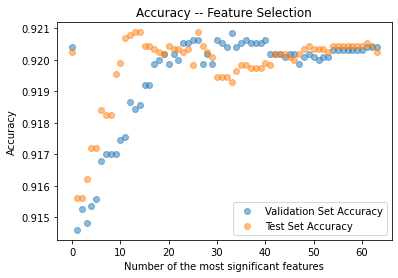

In [17]:
plt.figure()
plt.scatter(np.arange(sfm_accuracy_v.shape[0]), sfm_accuracy_v, label="Validation Set Accuracy", alpha=0.5)
plt.scatter(np.arange(sfm_accuracy_v.shape[0]), sfm_test_accuracy_v, label="Test Set Accuracy", alpha=0.5)
plt.legend()
plt.xlabel("Number of the most significant features")
plt.ylabel("Accuracy")
plt.title("Accuracy -- Feature Selection")

In [18]:
print(sfm_accuracy_v)

[0.92041712 0.91459934 0.91525796 0.91481888 0.91536773 0.91558727
 0.91679473 0.91701427 0.91701427 0.91701427 0.91745335 0.91756312
 0.91866081 0.91844127 0.91855104 0.91920966 0.91920966 0.91986828
 0.91997805 0.92019759 0.91986828 0.92019759 0.91997805 0.92052689
 0.92052689 0.92063666 0.92063666 0.91986828 0.92019759 0.91986828
 0.92063666 0.92052689 0.92041712 0.9208562  0.92041712 0.92052689
 0.92063666 0.92052689 0.92052689 0.92052689 0.92063666 0.92019759
 0.92019759 0.92019759 0.92008782 0.92019759 0.92019759 0.91986828
 0.92008782 0.92019759 0.92008782 0.91997805 0.92008782 0.92008782
 0.92030735 0.92030735 0.92030735 0.92030735 0.92030735 0.92030735
 0.92030735 0.92041712 0.92041712 0.92041712]


In [19]:
# num_features = 22
num_features = np.argmax(sfm_test_accuracy_v)
print(num_features)
new_train_X = train_X[:, ind_features[0:num_features]]
new_test_X = test_X[:, ind_features[0:num_features]]
reduced_test_data = test_X[:, ind_features[0:num_features]]
reduced_test_data = np.concatenate((reduced_test_data,test_y), axis=1)
small_test = np.array_split(reduced_test_data, 100)

13


In [20]:
# initialize and train logistic regression model
clf = LogisticRegression(max_iter=10000)
clf_start = timeit.default_timer()
clf.fit(new_train_X, train_y)
clf_end = timeit.default_timer()
print("Logistic Regression accuracy:", clf.score(new_test_X, test_y))
clf_runtime = clf_end - clf_start
print("Runtime:", str(clf_runtime)+" seconds")

Logistic Regression accuracy: 0.9206990427680688
Runtime: 0.11210062000000676 seconds


Overall death rate in this dataset: 0.08590497936243084


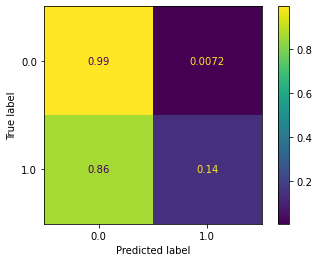

In [21]:
# this confusion matrix helps to explain why elective_surgery is dropped
y_true = test_y
y_pred = clf.predict(new_test_X)

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_true, y_pred) / np.sum(confusion_matrix(y_true, y_pred))
plot_confusion_matrix(clf, new_test_X, test_y, normalize='true')

overall_death_rate = np.mean(data_m[:,-1])
print("Overall death rate in this dataset:", overall_death_rate)

In [22]:
# small_test is the list of smaller test arrays
small_test_accuracy_v = np.zeros(100)
for i in range(len(small_test)):
    test_set = small_test[i]
    accuracy = clf.score(test_set[:,:-1], test_set[:,-1])
    small_test_accuracy_v[i] = accuracy

------
Max accuracy: 0.9824561403508771
Min accuracy: 0.8421052631578947
Mean accuracy: 0.920693215339233
Stdev of accuarcy: 0.023910254941241275


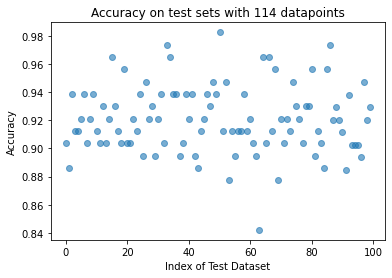

In [67]:
plt.figure()
plt.scatter(np.arange(small_test_accuracy_v.shape[0]), small_test_accuracy_v, alpha=0.6)
plt.xlabel("Index of Test Dataset")
plt.ylabel("Accuracy")
plt.title("Accuracy on test sets with 114 datapoints")

print("------")
print("Max accuracy:", np.max(small_test_accuracy_v))
print("Min accuracy:", np.min(small_test_accuracy_v))
print("Mean accuracy:", np.mean(small_test_accuracy_v))
print("Stdev of accuarcy:", np.std(small_test_accuracy_v))